In [1]:
import queueing_process as qp
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Placeholder delay distributions

In [2]:
def symptom_onset_to_joining_queue():
    return 2

In [3]:
def test_processing_delay_dist():
    return 1

In [30]:
days_to_simulate = 75
demand = [int(round(100*np.exp(0.05 * time))) for time in range(days_to_simulate)] 
capacity = [5 + time * 5 for time in range(days_to_simulate)]

In [31]:
my_queue = qp.queueing_process(
    days_to_simulate = days_to_simulate,
    capacity = capacity,
    demand = demand,
    symptom_onset_to_joining_queue_dist = symptom_onset_to_joining_queue,
    test_processing_delay_dist = test_processing_delay_dist
)

In [32]:
my_queue.run_simulation()

In [33]:
my_queue.queue_info

,time,new_applicants,capacity,spillover_to_next_day,total_applications_today,capacity_exceeded,capacity_exceeded_by,number_swabbed_today,number_left_queue_not_tested
0,0,100,500,0,100,False,0,100,0
1,1,105,505,0,105,False,0,105,0
2,2,111,510,0,111,False,0,111,0
3,3,116,515,0,116,False,0,116,0
4,4,122,520,0,122,False,0,122,0
...,...,...,...,...,...,...,...,...,...
70,70,3312,850,11525,13130,True,12280,850,1707
71,71,3481,855,12280,13908,True,13053,855,1853
72,72,3660,860,13053,14663,True,13803,860,2050
73,73,3847,865,13803,15502,True,14637,865,2148


Text(0.5, 1.0, 'Queueing process summary statistics')

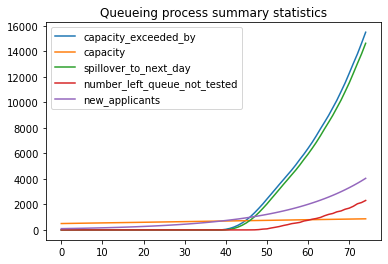

In [35]:
plt.plot('time','capacity_exceeded_by', data = my_queue.queue_info)
plt.plot('time','capacity', data = my_queue.queue_info)
plt.plot('time','spillover_to_next_day', data = my_queue.queue_info)
plt.plot('time','number_left_queue_not_tested', data = my_queue.queue_info)
plt.plot('time','new_applicants', data = my_queue.queue_info)
plt.legend()
plt.title('Queueing process summary statistics')

Text(0.5, 1.0, 'Symptom onset to receiving result distribution on day 60')

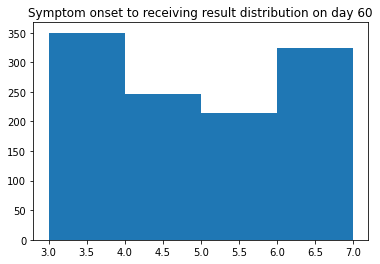

In [11]:
time = 60

delays = my_queue.get_delays_for(time_entered_queue = time,
                                 delay_from_column = 'symptom_onset',
                                 delay_to_column = 'time_received_result')

bin_count = delays.max() - delays.min()

delays.hist(bins = bin_count, grid = False)
plt.title(f'Symptom onset to receiving result distribution on day {time}')